In [1]:
import random, datetime
from pathlib import Path

from ultralytics import YOLO
from ultralytics.yolo.engine.results import Results
from ultralytics.yolo.utils import set_settings, DATASETS_DIR

import utils

### 学習に利用するデータセットを確認

(584, 600)
(917, 1500)
(323, 474)
(600, 800)
(570, 600)


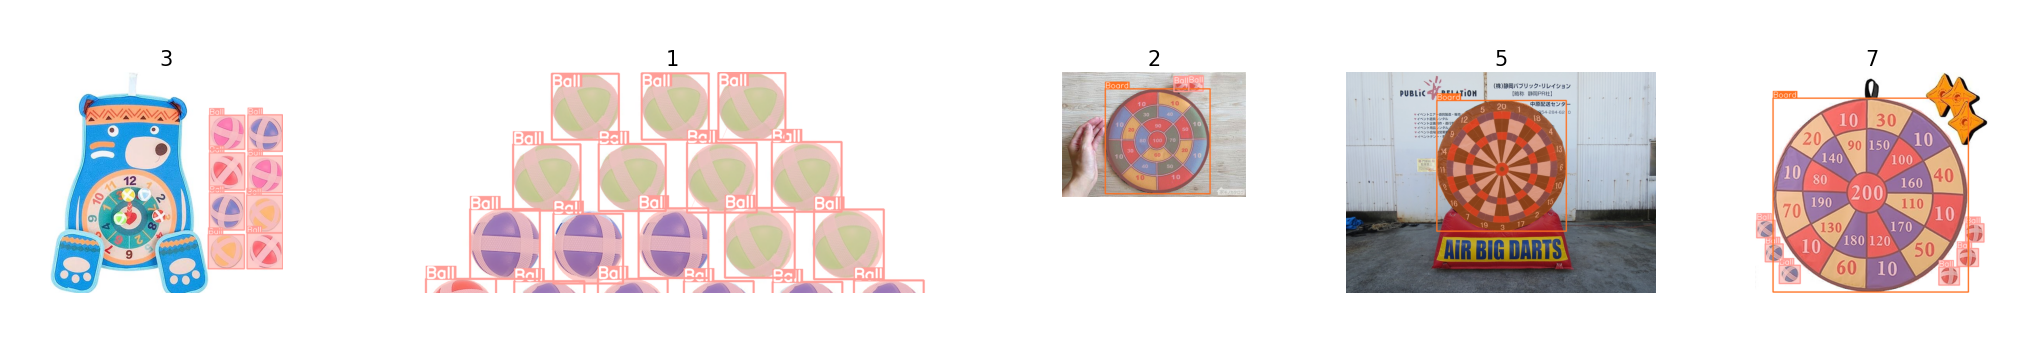

In [2]:
config_path = Path("./dataset/sentan-B_ball_detection_yolo/config.yaml")

if config_path.suffix != ".yaml":
    raise "not yaml"

yolo_data_train = utils.YOLO_dataset(str(config_path), "train")

imgs = {}
for i in random.sample(range(len(yolo_data_train)), 5):
    yolo_data = yolo_data_train[i]

    res = Results(
        orig_img  = yolo_data["orig_img"],
        path      = yolo_data["img_path"],
        names     = yolo_data_train.class_name,
        boxes     = yolo_data["bboxes"],
        masks     = yolo_data["masks"],
        keypoints = yolo_data["keypoints"],
    )

    imgs[i] = res.plot()[:, :, ::-1]

utils.show_imgs(imgs, ncol=5, dpi=500)

### YOLOライブラリにデータセットの場所を登録

In [3]:
set_settings({"datasets_dir": str(config_path.parent.parent.resolve())})

print(DATASETS_DIR)

C:\Users\hirahara\Documents\Python Scripts\sentan2023\20230713_yolov8_train\dataset


### 学習

In [6]:
dt_now = datetime.datetime.now().strftime('%Y%m%d-%H%M')

yolo_model_path = Path("./models/yolov8n.pt")
model = YOLO(str(yolo_model_path))

seed = -1
if seed < 0:
    seed = random.randint(1, 10000000)

print(Path(DATASETS_DIR).exists())

model.train(
                data    = str(config_path), 
                epochs  = 200,
                patience = 0,
                name    = f"{dt_now}_{yolo_model_path.stem}_{config_path.parent.name}",
                project = "./output/yolov8/",
                seed    = seed
            )


New https://pypi.org/project/ultralytics/8.0.133 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.128  Python-3.9.12 torch-2.0.1+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=models\yolov8n.pt, data=dataset\sentan-B_ball_detection_yolo\config.yaml, epochs=200, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=./output/yolov8/, name=20230713-1345_yolov8n_sentan-B_ball_detection_yolo, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=316454, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, 

True


 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    751897  ultralytics.nn.modules.head.Detect           [3, [64, 128, 256]]           
Model summary: 225 layers, 3011433 parameters, 3011417 gradients

Transferred 319/355 items from pretrained weights
train: Scanning C:\Users\hirahara\Documents\Python Scripts\sentan2023\20230713_yolov8_train\dataset\sentan-B_ball_detection_yolo\train\labels... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<00:00, 917.11it/s]
train: New cache created: C:\Users\hirahara\Documents\Python Scripts\sentan2023\20230713_yolov8_train\dataset\sentan-B_ball_detection_yolo\train\labels.cache
val: Scanning C:\Users\hirahara\Documents\Python Scripts\sentan2023\20230713_yolov8_train\dataset\sentan-B_ball_detection_yolo\train\labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
Plotting labels to output\yolov8\20230713-1345_

In [ ]:
model.export(format='onnx')